In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')


In [ ]:
df = pd.read_csv('https://cocl.us/datascience_survey_data', index_col = 0)
df.head(6)

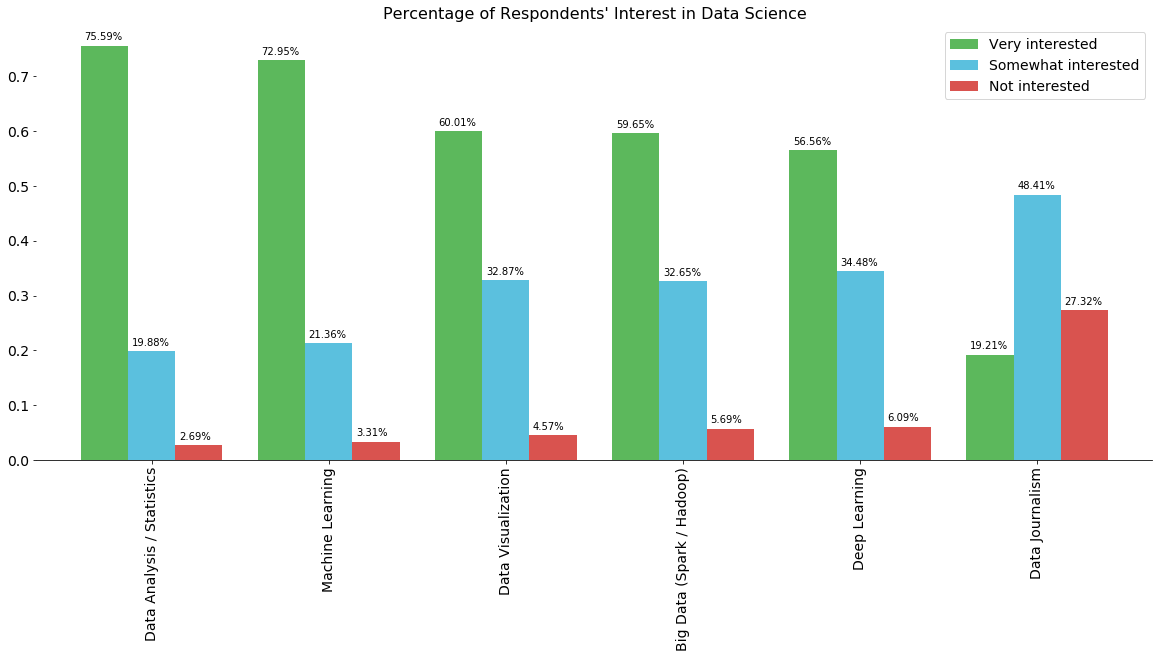

In [190]:
df.sort_values(by = 'Very interested', ascending = False, axis = 0, inplace = True)
df = df/2233

ax = df.plot(kind = 'bar', figsize = (20, 8), width = 0.8, color = ('#5cb85c', '#5bc0de', '#d9534f'), fontsize = 14)
ax.set_title("Percentage of Respondents' Interest in Data Science", fontsize = 16)
ax.legend(fontsize = 14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for p in ax.patches:
    ax.annotate("{:.2%}".format(p.get_height()),
                xy=(p.get_x() + 0.02, p.get_height() + 0.01))

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
IncidntNum,,,,,,,,,,,,
120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134


In [61]:
df1 = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

df1.rename(columns = {"PdDistrict": "Neighborhood"}, inplace = True)
df1 = df1.groupby(['Neighborhood']).size().reset_index(name='Count')
df1.head(10)

    

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [ ]:
SF_json = 'https://cocl.us/sanfran_geojson'

world_map = folium.Map(location=[37.7749, -122.4194] ,zoom_start = 12, ties = 'MapBox Bright')
world_map.choropleth(geo_data = SF_json, data = df1, columns = ['Neighborhood', 'Count'], fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity=0.2, key_on = 'feature.properties.name', legend = 'Crime Rate In San Fransisco' )